In [20]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt


$$h=\frac{\dot v}{wu_w}$$

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]


Text(0, 0.5, 'Coating width [$m$]')

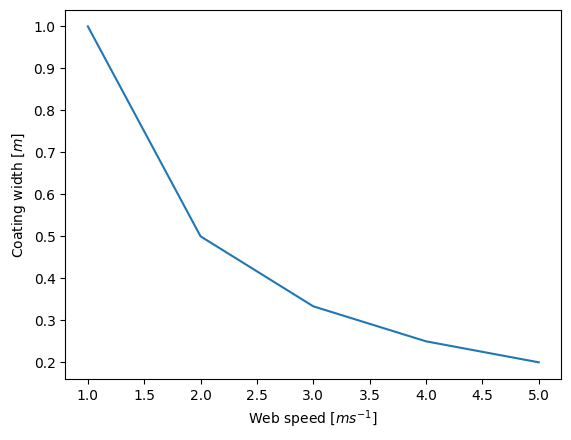

In [108]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Coating thickness [m]"] = v / (w * u_w)
#h = v / w * u_w 

# solve
#solver = pybamm.DummySolver()
#solution = solver.solve(model, t_eval=0)

#define list of parameters
#loop and solve model for each
#create list of solutions

#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": 3,
        "Volume flow [m3s-1]": 1,
    }
)
values = [1,2,3,4,5]
thickness = []

for i in values:
    param["Web speed [ms-1]"] = i
    sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
    sol = sim.solve([0, 1])
    thickness.append(sol["Coating thickness [m]"].entries[0])



print(thickness)

plt.plot(values, thickness)


#github copilot
#potential optimisation with input parameter

plt.xlabel(r"Web speed [$ms^{-1}$]")
plt.ylabel(r"Coating width [$m$]")



[2.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2]


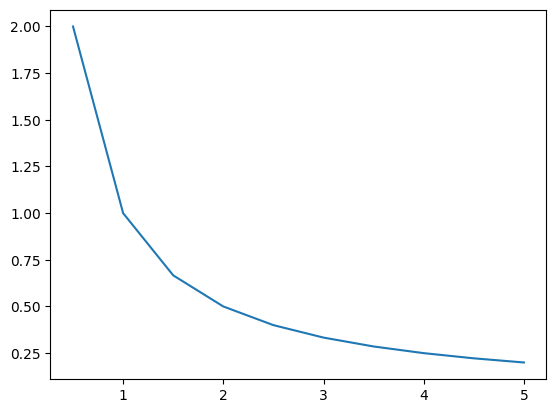

In [29]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Coating thickness [m]"] = v / w / u_w
#h = v / w * u_w 

# solve
#solver = pybamm.DummySolver()
#solution = solver.solve(model, t_eval=0)

#define list of parameters
#loop and solve model for each
#create list of solutions

#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": "[input]",
        "Volume flow [m3s-1]": 1,
    }
)
values = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
thickness = []

for i in values:
    sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
    sol = sim.solve([0, 1], inputs={"Web speed [ms-1]":i})
    thickness.append(sol["Coating thickness [m]"].entries[0])



print(thickness)

plt.plot(values, thickness)


#github copilot
#potential optimisation with input parameter

In [109]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")

# define variable
#h = pybamm.Variable("Coating thickness [m]")


# governing equations
model.variables["Coating thickness [m]"] = v / w / u_w
#h = v / w * u_w 

# solve
#solver = pybamm.DummySolver()
#solution = solver.solve(model, t_eval=0)

for i in len(range(u)):
    



#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": 3,
        "Volume flow [m3s-1]": 1,
    }
)

sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
sol = sim.solve([0, 3600])
sol.plot(["Coating thickness [m]"])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(["Coating thickness [m]"])
r = np.linspace(0, 1, 100)
ax2.plot(r, ["Coating thickness [m]"])
ax2.set_xlabel("r")
ax2.set_ylabel("Concentration at t=0.5")
plt.tight_layout()
plt.show()


IndentationError: expected an indented block (929099323.py, line 26)

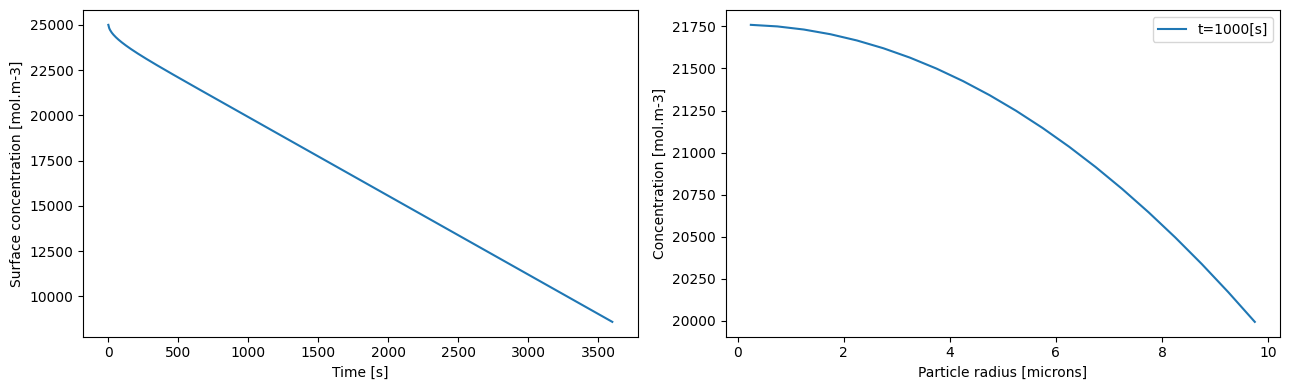

In [19]:
#Reference code from training

import pybamm
import numpy as np
import matplotlib.pyplot as plt

model = pybamm.BaseModel()

# define parameters
R = pybamm.Parameter("Particle radius [m]")
D = pybamm.Parameter("Diffusion coefficient [m2.s-1]")
j = pybamm.Parameter("Interfacial current density [A.m-2]")
F = pybamm.Parameter("Faraday constant [C.mol-1]")
c0 = pybamm.Parameter("Initial concentration [mol.m-3]")

# define variable
c = pybamm.Variable("Concentration [mol.m-3]", domain="negative particle")

# governing equations
N = -D * pybamm.grad(c)  # flux
dcdt = -pybamm.div(N)
model.rhs = {c: dcdt}  

# boundary conditions 
lbc = pybamm.Scalar(0)
rbc = -j / F / D
model.boundary_conditions = {c: {"left": (lbc, "Neumann"), "right": (rbc, "Neumann")}}

# initial conditions 
model.initial_conditions = {c: c0}

model.variables = {
    "Concentration [mol.m-3]": c,
    "Surface concentration [mol.m-3]": pybamm.surf(c),
    "Flux [mol.m-2.s-1]": N,
}

param = pybamm.ParameterValues(
    {
        "Particle radius [m]": 10e-6,
        "Diffusion coefficient [m2.s-1]": 3.9e-14,
        "Interfacial current density [A.m-2]": 1.4,
        "Faraday constant [C.mol-1]": 96485,
        "Initial concentration [mol.m-3]": 2.5e4,
    }
)

r = pybamm.SpatialVariable("r", domain=["negative particle"], coord_sys="spherical polar")
geometry = {"negative particle": {r: {"min": pybamm.Scalar(0), "max": R}}}

param.process_model(model)
param.process_geometry(geometry)

submesh_types = {"negative particle": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)

spatial_methods = {"negative particle": pybamm.FiniteVolume()}
disc = pybamm.Discretisation(mesh, spatial_methods)
disc.process_model(model)

# solve
solver = pybamm.ScipySolver()
t = np.linspace(0, 3600, 600)
solution = solver.solve(model, t)

# post-process, so that the solution can be called at any time t or space r
# (using interpolation)
c = solution["Concentration [mol.m-3]"]
c_surf = solution["Surface concentration [mol.m-3]"]

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(solution.t, c_surf(solution.t))
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Surface concentration [mol.m-3]")

r = mesh["negative particle"].nodes # radial position
time = 1000  # time in seconds
ax2.plot(r * 1e6, c(t=time, r=r), label="t={}[s]".format(time))
ax2.set_xlabel("Particle radius [microns]")
ax2.set_ylabel("Concentration [mol.m-3]")
ax2.legend()

plt.tight_layout()
plt.show()